<a href="https://colab.research.google.com/github/kiranfranklin999/Exploring_QSAR_from_data_curation_to_SAR/blob/main/model/Simple_FNN_QSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/content/Chembl_pIC50_maccs.csv")
data.head(1)

,SMILES,pIC50,0,1,2,3,4,5,6,7,...,157,158,159,160,161,162,163,164,165,166
0,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5.30103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [3]:
X=data.drop(['SMILES','pIC50'],axis=1)
y=data['pIC50']
X.shape,y.shape

((1130, 167), (1130,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.20, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.10, random_state=42)

In [8]:
X_train.shape,X_validation.shape,X_test.shape

((813, 167), (91, 167), (226, 167))

In [9]:
from sklearn.feature_selection import VarianceThreshold
feature_select = VarianceThreshold(threshold=0.05)
X_train = feature_select.fit_transform(X_train)
X_validation = feature_select.transform(X_validation)
X_test = feature_select.transform(X_test)
X_train.shape,X_validation.shape,X_test.shape

((813, 113), (91, 113), (226, 113))

In [10]:
type(X_train)

numpy.ndarray

In [ ]:
import tensorflow as tf

# Check for GPU availability
device = tf.device("GPU:0" if tf.config.list_physical_devices("GPU") else "CPU")
print(device)

# Convert arrays to tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
X_validation = tf.convert_to_tensor(X_validation, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
y_validation = tf.convert_to_tensor(y_validation, dtype=tf.float32)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((X_validation, y_validation))



In [17]:
X_train,X_test,X_validation

(<tf.Tensor: shape=(813, 113), dtype=float32, numpy=
 array([[1., 0., 0., ..., 1., 1., 1.],
        [0., 0., 1., ..., 1., 1., 0.],
        [1., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(226, 113), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 1.],
        [1., 0., 1., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 1., ..., 0., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(91, 113), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 1., 1.],
        [1., 1., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 1., 1.],
        ...,
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 0., 1.]], dtype=float32)>)

In [22]:
y_train,y_test,y_validation

(<tf.Tensor: shape=(813,), dtype=float32, numpy=
 array([9.09691  , 4.7988763, 3.954677 , 5.468521 , 5.6777806, 4.7525177,
        6.5686364, 6.920819 , 7.3439016, 6.       , 5.387216 , 3.6556077,
        4.5850267, 7.69897  , 7.455932 , 3.9713473, 8.69897  , 3.5228786,
        4.6478176, 4.91364  , 7.5228786, 5.4145393, 6.7447276, 5.080922 ,
        4.696804 , 4.609065 , 5.6382723, 5.309804 , 4.623423 , 5.8268137,
        4.8728952, 4.8827286, 5.5228786, 5.008774 , 4.5850267, 4.       ,
        6.221849 , 6.49485  , 6.221849 , 7.481486 , 4.7520266, 4.60206  ,
        7.236572 , 8.045757 , 5.180456 , 4.973058 , 7.221849 , 6.006123 ,
        8.455932 , 6.4012094, 4.9100947, 7.7695513, 4.8268137, 5.30103  ,
        5.8961964, 5.6882463, 7.1109786, 6.5086384, 7.207608 , 8.79588  ,
        5.8124795, 6.6655464, 4.387216 , 4.7851562, 7.7212462, 5.6575775,
        4.0680337, 5.026872 , 6.8416376, 6.79588  , 5.       , 8.552842 ,
        5.2276783, 3.8215988, 5.180456 , 8.619789 , 4.829738 , 

In [23]:
# Create data loaders
batch_size = 64
train_loader = train_dataset.batch(batch_size).shuffle(True)
validation_loader = validation_dataset.batch(batch_size)

In [24]:
train_loader

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 113), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [25]:
validation_loader

<_BatchDataset element_spec=(TensorSpec(shape=(None, 113), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [26]:


class Net(tf.keras.Model):
    def __init__(self, input_size, hidden_size, dropout_rate, output_size):
        super(Net, self).__init__()
        self.fc1 = tf.keras.layers.Dense(hidden_size)  # 1st Dense Layer
        self.fc2 = tf.keras.layers.Dense(hidden_size)
        self.fc3 = tf.keras.layers.Dense(hidden_size)
        self.fc_out = tf.keras.layers.Dense(output_size)  # Output layer
        self.ln1 = tf.keras.layers.LayerNormalization()
        self.ln2 = tf.keras.layers.LayerNormalization()
        self.ln3 = tf.keras.layers.LayerNormalization()
        self.activation = tf.keras.layers.LeakyReLU()
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
     
    def call(self, x):
        out = self.fc1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc_out(out)
        return out



In [27]:
# Define the hyperparameters
input_size = X_train.shape[-1]  # The input size should fit our fingerprint size
hidden_size = 50  # The size of the hidden layer
dropout_rate = 0.30  # The dropout rate
output_size = 1  # This is just a single task, so this will be one
learning_rate = 0.001  # The learning rate for the optimizer




In [28]:
model = Net(input_size, hidden_size, dropout_rate, output_size)
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))


In [29]:

epochs = 200
history = model.fit(train_loader, epochs=epochs, validation_data=validation_loader, verbose=1)



Epoch 1/200
13/13 [==============================] - 2s 20ms/step - loss: 15.7276 - val_loss: 2.6565
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 3.7175 - val_loss: 2.2396
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 2.7283 - val_loss: 2.8215
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 2.6078 - val_loss: 2.4740
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 2.5909 - val_loss: 2.1215
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 2.6175 - val_loss: 1.8694
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 2.4745 - val_loss: 1.8919
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 2.2695 - val_loss: 1.8798
Epoch 9/200
13/13 [==============================] - 0s 5ms/step - loss: 2.3100 - val_loss: 1.8282
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss: 2.1040 - val_loss: 1.6954
Epoch 1

In [30]:
# Print loss for each epoch
for epoch, loss in enumerate(history.history['loss']):
    if epoch % 10 == 0:
        val_loss = history.history['val_loss'][epoch]
        print("Epoch: %3i Training loss: %0.2F Validation loss: %0.2F" % (epoch, loss, val_loss))

Epoch:   0 Training loss: 15.73 Validation loss: 2.66
Epoch:  10 Training loss: 2.08 Validation loss: 1.62
Epoch:  20 Training loss: 1.48 Validation loss: 0.87
Epoch:  30 Training loss: 1.25 Validation loss: 0.52
Epoch:  40 Training loss: 1.11 Validation loss: 0.45
Epoch:  50 Training loss: 0.98 Validation loss: 0.39
Epoch:  60 Training loss: 0.99 Validation loss: 0.34
Epoch:  70 Training loss: 0.92 Validation loss: 0.37
Epoch:  80 Training loss: 0.84 Validation loss: 0.36
Epoch:  90 Training loss: 0.87 Validation loss: 0.31
Epoch: 100 Training loss: 0.79 Validation loss: 0.32
Epoch: 110 Training loss: 0.79 Validation loss: 0.30
Epoch: 120 Training loss: 0.68 Validation loss: 0.33
Epoch: 130 Training loss: 0.74 Validation loss: 0.31
Epoch: 140 Training loss: 0.71 Validation loss: 0.28
Epoch: 150 Training loss: 0.71 Validation loss: 0.33
Epoch: 160 Training loss: 0.65 Validation loss: 0.28
Epoch: 170 Training loss: 0.68 Validation loss: 0.28
Epoch: 180 Training loss: 0.62 Validation los

In [31]:
model.evaluate(train_loader)

13/13 [==============================] - 0s 2ms/step - loss: 0.2441


0.24412433803081512

In [32]:
model.evaluate(validation_loader)


2/2 [==============================] - 0s 5ms/step - loss: 0.3005


0.3004889488220215

In [33]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_loader = test_dataset.batch(batch_size)

In [34]:
model.evaluate(test_loader)

4/4 [==============================] - 0s 8ms/step - loss: 0.3257


0.32574498653411865

In [36]:
y_test_pred=model.predict(X_test)

8/8 [==============================] - 0s 1ms/step


In [38]:
y_pred_test_flat = np.array(y_test_pred).flatten()

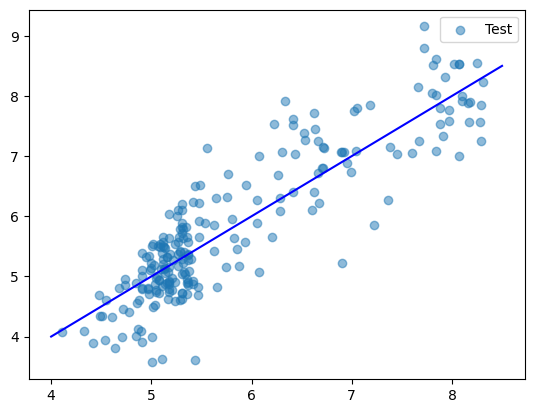

In [41]:
plt.scatter(y_pred_test_flat, y_test, alpha=0.5, label="Test")
plt.legend()
plt.plot([4, 8.5], [4,8.5], c="b")